<a href="https://colab.research.google.com/github/Nongbon/208499/blob/main/208499.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Nongbon/208499/main/ETH.csv

--2021-12-19 14:58:53--  https://raw.githubusercontent.com/Nongbon/208499/main/ETH.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410899 (401K) [text/plain]
Saving to: ‘ETH.csv’

ETH.csv             100%[===================>] 401.27K  --.-KB/s    in 0.03s   

2021-12-19 14:58:53 (11.6 MB/s) - ‘ETH.csv’ saved [410899/410899]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import dates as mpl_dates

In [ ]:
data = pd.read_csv("ETH.csv").drop(["slug","name","symbol","ref_cur","time_open","time_close","time_high","time_low","id","market_cap"],axis=1)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.rename({'timestamp':'date'},axis=1)

In [ ]:
data['date'] = data['date'].astype('str') 
data['date'] = data['date'].map(lambda x: x.rstrip('23:59:59'))
data['date'] = pd.to_datetime(data['date'])
data

,date,open,high,low,close,volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,1.643290e+05
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...,...
2303,2021-11-26,4522.209033,4550.842251,3933.506491,4030.909011,2.628180e+10
2304,2021-11-27,4042.999049,4187.683994,4033.513942,4096.912088,1.651569e+10
2305,2021-11-28,4101.648807,4297.916511,3989.969988,4294.453696,1.595313e+10
2306,2021-11-29,4296.946820,4460.848802,4284.504735,4445.105008,1.908648e+10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2308 non-null   datetime64[ns]
 1   open    2308 non-null   float64       
 2   high    2308 non-null   float64       
 3   low     2308 non-null   float64       
 4   close   2308 non-null   float64       
 5   volume  2308 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 108.3 KB


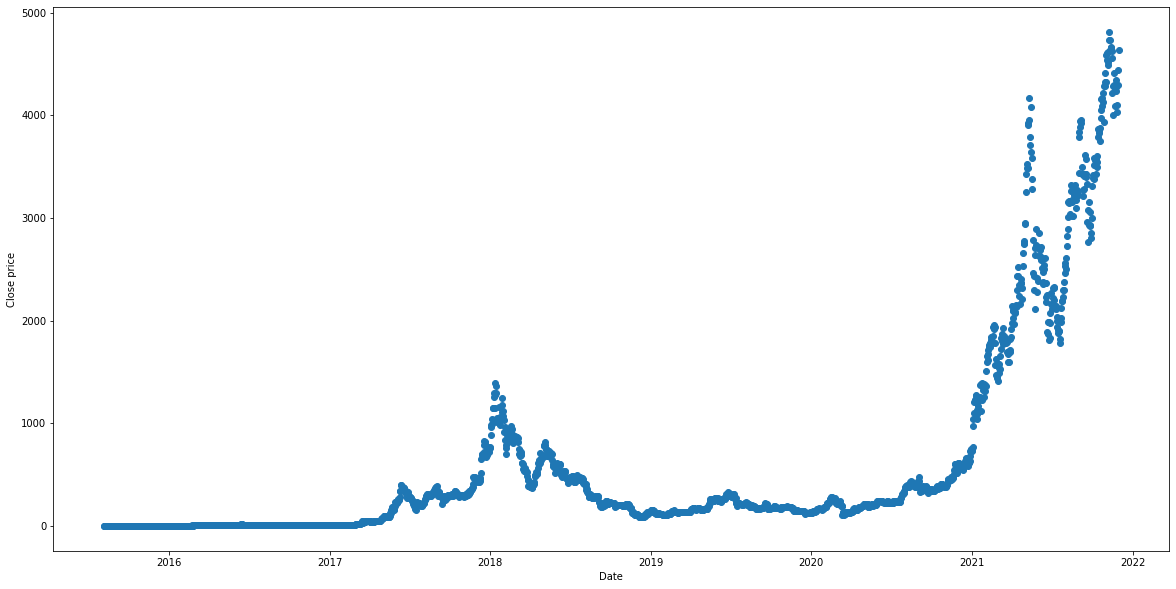

In [ ]:
plt.figure(figsize=(20,10))
plt.plot_date(data['date'],data['close'])
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

In [ ]:
n = len(data)
n

2308

In [ ]:
data['label'] = ''
for i in range(len(data)) :
  if i+1 < n :
    data['label'][i+1] = data['close'][i+1] / data['close'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['Y'] = ''
for i in range(len(data)) :
  if i+1 < n :
    if data['label'][i+1] > 1 :
      data['Y'][i+1] = 1
    else : 
      data['Y'][i+1] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#data.to_csv("label.csv")

### **Input Indicator**

In [ ]:
t_period = 10

# **WMA**

In [ ]:
weights = np.arange(1,11)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
data['wma10'] = ''
data['wma10'] = data['close'].rolling(t_period).apply(lambda close: np.dot(close, weights)/weights.sum(), raw=True)

## **SMA**

In [ ]:
data['sma10'] = ''
data['sma10'] = data['close'].rolling(t_period).mean()

MACD

In [ ]:
exp1 = data['close'].ewm(span = 12 , adjust = False , min_periods=12).mean()
exp2 = data['close'].ewm(span = 26 , adjust = False , min_periods=26).mean()
macd = exp1 - exp2
data['MACD'] = macd

In [ ]:
k_period = 14
# Adds a "n_high" column with max value of previous 14 periods
n_high = data['high'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
n_low = data['low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
data['%K'] = (data['close'] - n_low)  / (n_high - n_low) * 100

In [ ]:
def rsi(data, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = data['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [ ]:
data['RSI'] = rsi(data, periods = 14, ema = True)

In [ ]:
def get_wr(high, low, close, periods = 14):
    highh = high.rolling(14).max() 
    lowl = low.rolling(14).min()
    wr = -100 * ((highh - close) / (highh - lowl))
    return wr

data['%R'] = get_wr(data['high'], data['low'], data['close'], periods = 14)

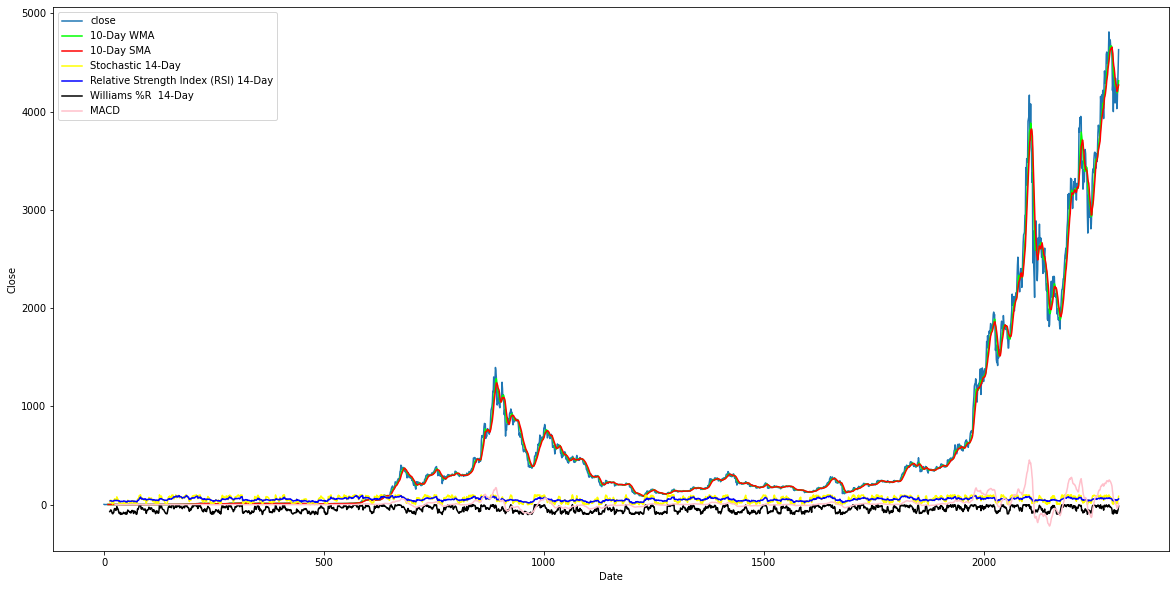

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(data['close'], label="close")
plt.plot(data['wma10'], label="10-Day WMA" , color='lime')
plt.plot(data['sma10'], label="10-Day SMA", color='red')
plt.plot(data['%K'], label="Stochastic 14-Day", color='yellow')
plt.plot(data['RSI'], label="Relative Strength Index (RSI) 14-Day", color='blue')
plt.plot(data['%R'], label="Williams %R  14-Day", color='Black')
plt.plot(data['MACD'], label="MACD", color='pink')
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

In [ ]:
data = data.dropna()

In [ ]:
data = data.astype({"Y":int})

In [ ]:
data

,date,open,high,low,close,volume,label,Y,wma10,sma10,MACD,%K,RSI,%R
25,2015-09-01,1.353480,1.392740,1.336630,1.351610,7.788620e+05,0.995119,0,1.260630,1.243478,-0.193357,58.589932,43.772935,-41.410068
26,2015-09-02,1.351570,1.354910,1.264620,1.294790,8.837690e+05,0.957961,0,1.269960,1.237698,-0.179722,47.101644,41.931344,-52.898356
27,2015-09-03,1.295190,1.309990,1.211030,1.264930,7.029910e+05,0.976938,0,1.274911,1.241064,-0.169373,41.064315,40.956172,-58.935685
28,2015-09-04,1.264930,1.302520,1.236810,1.274410,4.743910e+05,1.00749,1,1.280974,1.254486,-0.158579,51.275983,41.421951,-48.724017
29,2015-09-05,1.280560,1.342300,1.271190,1.338810,4.484530e+05,1.05053,1,1.296306,1.272369,-0.143177,79.621677,44.618160,-20.378323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2021-11-26,4522.209033,4550.842251,3933.506491,4030.909011,2.628180e+10,0.942959,0,4214.362366,4224.107086,-27.366692,10.165175,42.776168,-89.834825
2304,2021-11-27,4042.999049,4187.683994,4033.513942,4096.912088,1.651569e+10,1.01637,1,4191.236003,4205.038901,-39.258752,17.053423,44.768476,-82.946577
2305,2021-11-28,4101.648807,4297.916511,3989.969988,4294.453696,1.595313e+10,1.04822,1,4207.493238,4234.419184,-32.370195,37.669368,50.341055,-62.330632
2306,2021-11-29,4296.946820,4460.848802,4284.504735,4445.105008,1.908648e+10,1.03508,1,4245.799752,4249.099023,-14.586518,53.391721,54.141124,-46.608279


In [ ]:
X = data[['wma10','sma10','MACD','%K','RSI','%R']].to_numpy()
y = data.Y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , shuffle= False)

In [ ]:
X_train

array([[ 1.26063035e+00,  1.24347799e+00, -1.93357220e-01,
         5.85899321e+01,  4.37729355e+01, -4.14100679e+01],
       [ 1.26995981e+00,  1.23769799e+00, -1.79722228e-01,
         4.71016441e+01,  4.19313436e+01, -5.28983559e+01],
       [ 1.27491109e+00,  1.24106400e+00, -1.69373421e-01,
         4.10643153e+01,  4.09561715e+01, -5.89356847e+01],
       ...,
       [ 3.92327771e+02,  3.95636825e+02,  1.03899925e+01,
         3.14703221e+01,  5.39146052e+01, -6.85296779e+01],
       [ 3.93106797e+02,  3.94982593e+02,  9.90294983e+00,
         3.73884701e+01,  5.51855536e+01, -6.26115299e+01],
       [ 3.99181911e+02,  3.96178185e+02,  1.16799594e+01,
         7.90299155e+01,  6.29317923e+01, -2.09700845e+01]])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1826, 6) (457, 6) (1826,) (457,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf.best_estimator_, 
                           feature_names=X.columns,  
                           class_names= ['0', '1'], 
                           filled=True,
                           impurity=False)

graph = graphviz.Source(dot_data,format="png") 
graph

In [ ]:
from sklearn.metrics import classification_report as clf_report

print(clf_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       197
           1       0.66      0.53      0.59       260

    accuracy                           0.58       457
   macro avg       0.59      0.59      0.58       457
weighted avg       0.60      0.58      0.58       457



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()

clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report as clf_report
print(clf_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       197
           1       0.74      0.66      0.70       260

    accuracy                           0.67       457
   macro avg       0.67      0.68      0.67       457
weighted avg       0.68      0.67      0.68       457



In [ ]:
from xgboost import XGBClassifier
clf4 = XGBClassifier()
clf4.fit(X_train,y_train)

y_pred4 = clf4.predict(X_test)

In [ ]:
print(clf_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       197
           1       0.71      0.72      0.71       260

    accuracy                           0.67       457
   macro avg       0.67      0.66      0.66       457
weighted avg       0.67      0.67      0.67       457



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf3 = ExtraTreesClassifier()
clf3.fit(X_train,y_train)

y_pred3 = clf3.predict(X_test)

In [ ]:
print(clf_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       197
           1       0.80      0.55      0.65       260

    accuracy                           0.67       457
   macro avg       0.69      0.69      0.67       457
weighted avg       0.71      0.67      0.66       457

